In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as ply
import pandas as pd
from dateutil import parser
import pytz
import plotly.express as px

In [28]:
data = pd.read_csv('order_items.csv')

In [29]:
data['created_at'] = data['created_at'].map(parser.parse)
data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,16000,10975,8831,13606,43216,Complete,2020-09-14 17:59:04+00:00,2020-09-16 12:05:00 UTC,2020-09-17 21:47:00 UTC,NaN,2.5
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype                  
---  ------             --------------   -----                  
 0   id                 180976 non-null  int64                  
 1   order_id           180976 non-null  int64                  
 2   user_id            180976 non-null  int64                  
 3   product_id         180976 non-null  int64                  
 4   inventory_item_id  180976 non-null  int64                  
 5   status             180976 non-null  object                 
 6   created_at         180976 non-null  datetime64[ns, tzutc()]
 7   shipped_at         118302 non-null  object                 
 8   delivered_at       63484 non-null   object                 
 9   returned_at        18117 non-null   object                 
 10  sale_price         180976 non-null  float64                
dtypes: datetime64[ns, tzutc()](1), float64(

In [31]:
data['created_at'][0].hour

17

In [32]:
data['hour'] = data['created_at'].map(lambda ts: ts.hour)
data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,hour
0,16000,10975,8831,13606,43216,Complete,2020-09-14 17:59:04+00:00,2020-09-16 12:05:00 UTC,2020-09-17 21:47:00 UTC,NaN,2.5,17
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5,6
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5,5
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0,17
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0,5


In [33]:
grouped_hour = data.groupby(['hour']) ['id'].count()
grouped_hour

hour
0     9482
1     9220
2     9352
3     9617
4     9631
5     9705
6     9577
7     9628
8     9404
9     9581
10    9402
11    9445
12    9350
13    9648
14    9482
15    8794
16    6574
17    4004
18    1647
19      51
20     756
21    3209
22    5462
23    7955
Name: id, dtype: int64

<Axes: title={'center': 'Order Hours'}, xlabel='Hour', ylabel='count'>

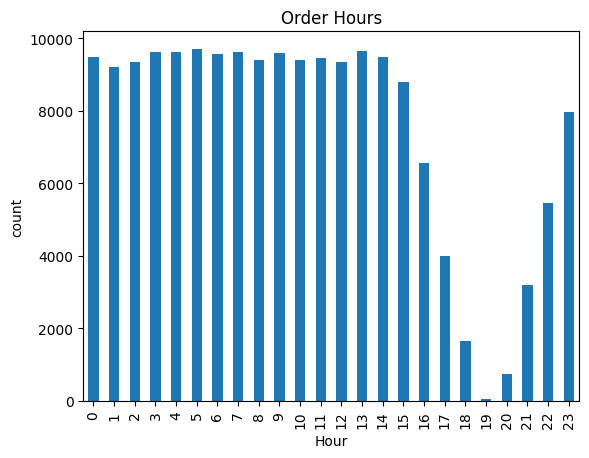

In [34]:
grouped_hour.plot.bar(title='Order Hours',xlabel='Hour',ylabel='count')

Text(0.5, 1.0, 'Plot Density')

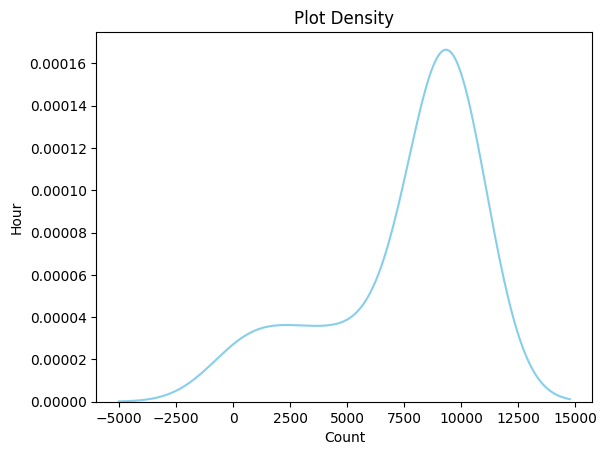

In [35]:
sns.kdeplot(grouped_hour, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Hour')
plt.title('Plot Density')

In [37]:
value_counts = data ['status'].value_counts().to_dict()
value_counts

{'Shipped': 54818,
 'Complete': 45367,
 'Processing': 35727,
 'Cancelled': 26947,
 'Returned': 18117}

In [38]:
count_value = list(value_counts.values())
count_labels = list(value_counts.keys())
count_value

[54818, 45367, 35727, 26947, 18117]

In [40]:
fig = ply.graph_objs.Figure(
    data=[
        ply.graph_objs.Pie(labels=count_labels,values=count_value)]
    )
fig.update_layout(title_text='Status Distribution')
fig.show()